# Data Analytics II

1. Implement logistic regression using Python/R to perform classification on 
Social_Network_Ads.csv dataset. 
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
on the given dataset. 

### import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [7]:
df.shape

(400, 5)

In [8]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [10]:
df.isna()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [11]:
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [12]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Convert Categorical data into numerical data

In [13]:
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10520\697968965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10520\697968965.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].re

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

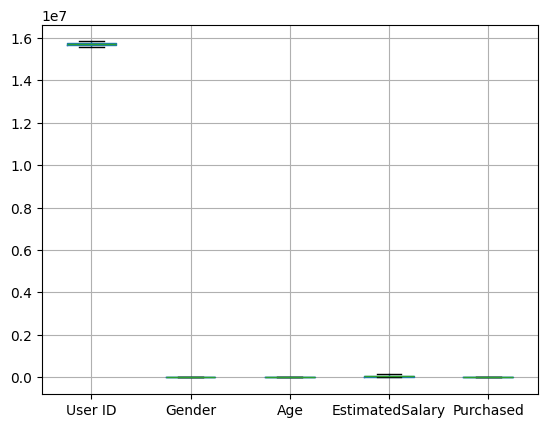

In [15]:
df.boxplot()

### Model Building

In [16]:
X=df.drop(['Purchased'],axis=1)
Y=df['Purchased']

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logreg=LogisticRegression()

In [20]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [21]:
print(xtrain)
print("-------------\n")
print(xtest)
print("-------------\n")
print(ytrain)
print("-------------\n")
print(ytest)
print("-------------\n")
print(y_pred)

      User ID  Gender  Age  EstimatedSalary
336  15664907       0   58           144000
64   15605000       1   59            83000
55   15649136       1   24            55000
106  15706185       1   26            35000
300  15736397       1   58            38000
..        ...     ...  ...              ...
323  15619465       1   48            30000
192  15779581       0   29            43000
117  15591433       0   36            52000
47   15776348       1   27            54000
172  15794661       1   26           118000

[320 rows x 4 columns]
-------------

      User ID  Gender  Age  EstimatedSalary
132  15725660       0   30            87000
309  15652400       1   38            50000
341  15776844       0   35            75000
196  15738448       1   30            79000
246  15638003       1   35            50000
..        ...     ...  ...              ...
14   15628972       0   18            82000
363  15768293       1   42            79000
304  15598070       1   40           

NameError: name 'y_pred' is not defined

### Evaluation Parameters

In [ ]:
from sklearn.metrics import precision_score,confusion_matrix,accuracy_score,recall_score,classification_report

In [ ]:
cm=confusion_matrix(ytest,y_pred)
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [ ]:
print("Accuracy : ", accuracy_score(ytest,y_pred))

Accuracy :  0.9125


In [ ]:
ps=precision_score(ytest,y_pred)

In [ ]:
ps

0.8947368421052632

In [ ]:
rs=recall_score(ytest,y_pred)
rs

0.7727272727272727

In [ ]:
error_rate=1-accuracy_score(ytest,y_pred)
error_rate

0.08750000000000002

In [ ]:
print("classification report: ", classification_report(ytest,y_pred))

classification report:                precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80

